Analysis: 
1. Temperature increase as we get closer to equator. Highest temperature is around 0-20 degrees. 
2. Latitude and humidity/cloudiness do not have much correlation. 
3. Latitude and wind speed do not have much correlation as well. 

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

#url = "http://api.openweathermap.org/data/2.5/weather?"
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


In [4]:
# loop through the data to get attributes for Data frame 
city_name_all = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

print(f"Beginning Data Retrival")
print(f"------------------------")

for city in cities: 
    try:
        query_url = f"{url}appid={api_key}&q={city}&units={units}"
        response = requests.get(f"{query_url}&g={city}").json()
        city_name_all.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record}| {city_record}")
        print(f"{query_url}&q={city}")
        
        record = record + 1
    except: 
        print("City not found. Skipping...")
    continue 

Beginning Data Retrival
------------------------
Processing Record 1| Bilibino
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=bilibino&units=imperial&q=bilibino
Processing Record 2| Craigieburn
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=craigieburn&units=imperial&q=craigieburn
Processing Record 3| Lebu
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=lebu&units=imperial&q=lebu
Processing Record 4| Shubarshi
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=shubarshi&units=imperial&q=shubarshi
Processing Record 5| Punta Arenas
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=punta arenas&units=imperial&q=punta arenas
Processing Record 6| Hokitika
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=hokitika&units=imperial&q=hokitika
Processing Record 7| 

Processing Record 53| Kapaa
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=kapaa&units=imperial&q=kapaa
Processing Record 54| Valparaiso
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=valparaiso&units=imperial&q=valparaiso
Processing Record 55| Herrin
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=herrin&units=imperial&q=herrin
Processing Record 56| Tuy Hoa
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=tuy hoa&units=imperial&q=tuy hoa
Processing Record 57| Avarua
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=avarua&units=imperial&q=avarua
Processing Record 58| Hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=hithadhoo&units=imperial&q=hithadhoo
Processing Record 59| Porto Novo
http://api.openweathermap.org/data/2.5/weather?appid=fde80

Processing Record 105| Morondava
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=morondava&units=imperial&q=morondava
City not found. Skipping...
Processing Record 106| Chuy
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=chuy&units=imperial&q=chuy
Processing Record 107| Haines Junction
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=haines junction&units=imperial&q=haines junction
Processing Record 108| Fez
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=fez&units=imperial&q=fez
Processing Record 109| Goderich
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=goderich&units=imperial&q=goderich
Processing Record 110| Lompoc
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=lompoc&units=imperial&q=lompoc
Processing Record 111| Barrow
http://api.openweathe

Processing Record 157| Salinopolis
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=salinopolis&units=imperial&q=salinopolis
Processing Record 158| Rugeley
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=rugeley&units=imperial&q=rugeley
Processing Record 159| Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=puerto ayora&units=imperial&q=puerto ayora
Processing Record 160| Liverpool
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=liverpool&units=imperial&q=liverpool
Processing Record 161| Mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=mahebourg&units=imperial&q=mahebourg
City not found. Skipping...
Processing Record 162| Eureka
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=eureka&units=imperial&q=eureka
Processing Record 163| W

City not found. Skipping...
Processing Record 209| Okhotsk
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=okhotsk&units=imperial&q=okhotsk
City not found. Skipping...
Processing Record 210| Qaqortoq
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=qaqortoq&units=imperial&q=qaqortoq
City not found. Skipping...
Processing Record 211| Katsuura
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=katsuura&units=imperial&q=katsuura
Processing Record 212| Nabire
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=nabire&units=imperial&q=nabire
City not found. Skipping...
City not found. Skipping...
Processing Record 213| Guararapes
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=guararapes&units=imperial&q=guararapes
Processing Record 214| Mayya
http://api.openweathermap.org/data/2.5/weather?appid=fde80d

Processing Record 260| Hobyo
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=hobyo&units=imperial&q=hobyo
Processing Record 261| Usakos
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=usakos&units=imperial&q=usakos
Processing Record 262| Shaowu
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=shaowu&units=imperial&q=shaowu
Processing Record 263| Sungaipenuh
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=sungaipenuh&units=imperial&q=sungaipenuh
Processing Record 264| Puno
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=puno&units=imperial&q=puno
Processing Record 265| Nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=nikolskoye&units=imperial&q=nikolskoye
Processing Record 266| Lock Haven
http://api.openweathermap.org/data/2.5/weather?appid=f

City not found. Skipping...
Processing Record 312| Cherskiy
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=cherskiy&units=imperial&q=cherskiy
Processing Record 313| Pochutla
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=pochutla&units=imperial&q=pochutla
Processing Record 314| Emerald
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=emerald&units=imperial&q=emerald
Processing Record 315| Ikwiriri
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=ikwiriri&units=imperial&q=ikwiriri
Processing Record 316| Khudat
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=xudat&units=imperial&q=xudat
Processing Record 317| El Carmen
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=el carmen&units=imperial&q=el carmen
Processing Record 318| Hofn
http://api.openweather

Processing Record 365| Pangai
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=pangai&units=imperial&q=pangai
Processing Record 366| Cayenne
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=cayenne&units=imperial&q=cayenne
Processing Record 367| Muros
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=muros&units=imperial&q=muros
Processing Record 368| Kampot
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=kampot&units=imperial&q=kampot
Processing Record 369| Norman Wells
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=norman wells&units=imperial&q=norman wells
Processing Record 370| Hearst
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=hearst&units=imperial&q=hearst
Processing Record 371| Mezhdurechensk
http://api.openweathermap.org/data/2.5/weather?app

Processing Record 416| Trelleborg
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=trelleborg&units=imperial&q=trelleborg
Processing Record 417| Tura
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=tura&units=imperial&q=tura
Processing Record 418| Macusani
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=macusani&units=imperial&q=macusani
Processing Record 419| Fortuna Foothills
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=fortuna foothills&units=imperial&q=fortuna foothills
Processing Record 420| Cockburn Town
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=cockburn town&units=imperial&q=cockburn town
Processing Record 421| Camacha
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=camacha&units=imperial&q=camacha
Processing Record 422| Dalbandin
http

Processing Record 521| Bozuyuk
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=bozuyuk&units=imperial&q=bozuyuk
Processing Record 522| Nikki
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=nikki&units=imperial&q=nikki
Processing Record 523| Skibbereen
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=skibbereen&units=imperial&q=skibbereen
Processing Record 524| Luderitz
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=luderitz&units=imperial&q=luderitz
Processing Record 525| Yenagoa
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=yenagoa&units=imperial&q=yenagoa
Processing Record 526| Tara
http://api.openweathermap.org/data/2.5/weather?appid=fde80d89e72817b93e96a76560ebfdd1&q=tara&units=imperial&q=tara
Processing Record 527| Bathsheba
http://api.openweathermap.org/data/2.5/weather?appid=fde80

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create dataframe 
weather_dictionary = {
    "City":city_name_all,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Wind Speed":wind_speed
}

weather_dataframe = pd.DataFrame(weather_dictionary)
weather_dataframe.count()

City          567
Cloudiness    567
Country       567
Date          567
Humidity      567
Lat           567
Lng           567
Max Temp      567
Wind Speed    567
dtype: int64

In [7]:
#print csv file 
weather_dataframe.to_csv("weather_dataframe.csv")
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bilibino,62,RU,1562524979,54,68.06,166.44,56.39,10.87
1,Craigieburn,75,AU,1562524979,93,-37.60,144.94,54.00,8.05
2,Lebu,40,ET,1562524979,77,8.96,38.73,62.60,2.24
3,Shubarshi,16,KZ,1562524711,36,48.59,57.19,77.27,7.18
4,Punta Arenas,90,CL,1562524980,93,-53.16,-70.91,42.80,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

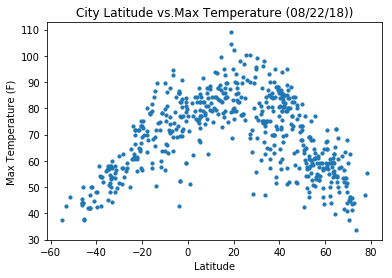

In [8]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Max Temp"],marker = "o",s=10)

# title and axis labels
plt.title("City Latitude vs.Max Temperature (08/22/18))")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
# Save Figure
plt.savefig("Latitude vs. Temperature Plot.png")
plt.show()

#### Latitude vs. Humidity Plot

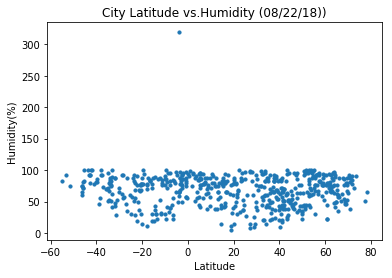

In [9]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Humidity"],marker = "o",s=10)

# title and axis labels
plt.title("City Latitude vs.Humidity (08/22/18))")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
# Save Figure
plt.savefig("Latitude vs. Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

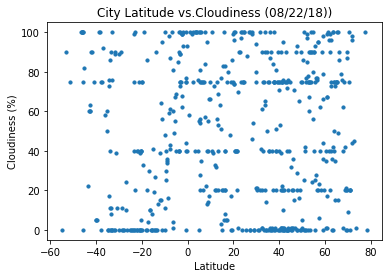

In [10]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Cloudiness"],marker = "o",s=10)

# title and axis labels
plt.title("City Latitude vs.Cloudiness (08/22/18))")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Save Figure
plt.savefig("Latitude vs. Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

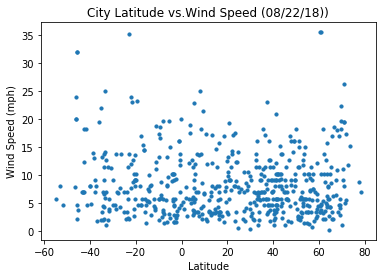

In [11]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Wind Speed"],marker = "o",s=10)

# title and axis labels
plt.title("City Latitude vs.Wind Speed (08/22/18))")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# Save Figure
plt.savefig("Latitude vs. Wind Speed.png")
plt.show()